# Impact of computing on conventional businesses and markets

The porpuse of this reseach is evaluate how advances in computing in the last decade has impacted on existent conventional businesses and markets, As rule we will analyze industries that existed long behore computing.

### Dependencies

In [135]:
# Standard packages
import pandas as pd
import numpy as np
import re

# Installed packages
from IPython.display import display
from matplotlib import pyplot as plt
%pip install seaborn
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

# Local packages
# NOTE: avoid having to use a local module to ease use of Google Colab

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


### Globals and constants

In [136]:
# Constants
DATE_COLUMN = 'Year'
MIN_YEAR = 2001
MAX_YEAR = 2020
DATASETS_FOLDER = './content'
SAVE_CLEANED_DATA = False

# Global state
population = None # Used to normalize data

### Reviewing Computing Advances

Transistor information was extracted from [wikipedia transistor count](https://en.wikipedia.org/wiki/Transistor_count) using [wikitable2csv.ggor.de](https://wikitable2csv.ggor.de/) to extract the tables.

In [137]:
# We will merge all computer dataframes into one
computer_dfs = []

In [138]:
def ensure_date_type(df: pd.DataFrame, date_column:str=DATE_COLUMN) -> pd.DataFrame:
    """Ensure date type"""
    df[date_column] = df[date_column].astype(int)
    return df

def keep_columns(df:pd.DataFrame, columns:list) -> pd.DataFrame:
    """Keep only the specified columns"""
    return df[columns]

def date_to_year(df:pd.DataFrame, date_column:str) -> pd.DataFrame:
    """Convert DATE_COLUMN to year and rename column to 'Year'"""
    # Convert to year
    year_pattern = r'\d{4}'
    df[date_column] = df[date_column].astype(str)
    df = df[df[date_column].str.contains(year_pattern)]
    df[date_column] = df[date_column].apply(lambda x: re.findall(year_pattern, x)[0])
    # Rename
    if date_column != DATE_COLUMN:
        df = df.rename(columns={date_column: DATE_COLUMN})
    return df

def remove_commas(df:pd.DataFrame) -> pd.DataFrame:
    """Remove commas from all columns"""
    return df.apply(lambda x: x.str.replace(',', ''))

def convert_to_float(df:pd.DataFrame, columns:list) -> pd.DataFrame:
    """Convert the specified columns to float"""
    for col in columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    return df

def cut_add_years(
        df: pd.DataFrame,
        year_column:str=DATE_COLUMN,
        min_year:int=MIN_YEAR,
        max_year:int=MAX_YEAR
        ) -> pd.DataFrame:
    """Cut the dataframe to the specified years and add missing years"""
    df = ensure_date_type(df, year_column)
    # Add missing years
    for year in range(min_year, max_year):
        if year not in df[year_column].values:
            df = pd.concat([df, pd.DataFrame.from_records([{ year_column: year }])])
    df = df.sort_values(by=[year_column]).reset_index(drop=True)
    # Cut
    df = df[(df[year_column] >= min_year) & (df[year_column] <= max_year)]
    return df

def keep_highest_per_year(
        df: pd.DataFrame,
        value_column:str,
        year_column:str=DATE_COLUMN
        ) -> pd.DataFrame:
    """Keep only the highest value for each year, useful when we want only the
       advance of a technology, so we don't care about the lower values"""
    df = df.sort_values(by=[year_column, value_column], ascending=False)
    df = df.drop_duplicates(subset=[year_column], keep='first')
    # Back to the original order
    df = df.sort_values(by=[year_column]).reset_index(drop=True)
    return df

def year_column_to_row(df:pd.DataFrame, country_row:str, new_column_name:str) -> pd.DataFrame:
    """Converts columns to rows and filters by country, useful for the world bank data datasets"""
    # Filter rows by country
    df = df[df['Country Name'] == country_row]
    # Remove columns that are not a year
    df = df[df.columns[df.columns.str.contains(r'\d{4}')]]
    # Convert columns to rows
    df = df.melt(id_vars=[], var_name=DATE_COLUMN, value_name=new_column_name)
    return df

def normalize_with_population(df:pd.DataFrame, column:str) -> pd.DataFrame:
    """Normalize the value column with the population column"""
    return df ## TODO: fix this
    assert population is not None, 'Population dataframe is not loaded'
    df[column] = np.divide(df[column], population['US Population']) * 100
    return df

def merge_by_year(dataframes:list) -> pd.DataFrame:
    """Merge all dataframes by year,
       NOTE: all dataframes should have the same year column values"""
    result = pd.DataFrame()
    result[DATE_COLUMN] = dataframes[0][DATE_COLUMN].unique()
    result = ensure_date_type(result)
    # Merge dataframes
    for df in dataframes:
        df = ensure_date_type(df)
        result = pd.merge(result, df, on=DATE_COLUMN, how='outer')
    result = cut_add_years(result)
    return result

Flash memory

# Original data


,Chip name,Capacity (bits),Flash type,FGMOS transistor count,Date of introduction,Manufacturer(s),Process,Area,"Transistor density, tr./mm2",Ref
19,KLMCG8GE4A,512 Gb,Stacked 2-bit NAND,"256,000,000,000",2011,Samsung,?,192 mm2,"1,333,000,000",NaN
20,KLUFG8R1EM,4 Tb,Stacked 3-bit V-NAND,"1,365,333,333,504",2017,Samsung,?,150 mm2,"9,102,000,000",NaN
21,eUFS (1 TB),8 Tb,Stacked 4-bit V-NAND,"2,048,000,000,000",2019,Samsung,?,150 mm2,"13,650,000,000",NaN
22,?,1 Tb,232L TLC NAND die,"333,333,333,333",2022,Micron,?,68.5 mm2 (memory array),"4,870,000,000 (14.6 Gbit/mm2)",NaN
23,?,16 Tb,232L package,"5,333,333,333,333",2022,Micron,?,68.5 mm2 (memory array),"77,900,000,000 (16× 14.6 Gbit/mm2)",NaN


# Cleaned data


,FGMOS transistor count,Year
14,2.560000e+11,2015
15,2.560000e+11,2016
16,1.365333e+12,2017
17,1.365333e+12,2018
18,2.048000e+12,2019


,FGMOS transistor count,Year
count,1.900000e+01,19.000000
mean,3.829278e+11,2010.000000
std,5.649140e+11,5.627314
min,5.368709e+08,2001.000000
25%,2.576980e+10,2005.500000
50%,2.560000e+11,2010.000000
75%,2.560000e+11,2014.500000
max,2.048000e+12,2019.000000


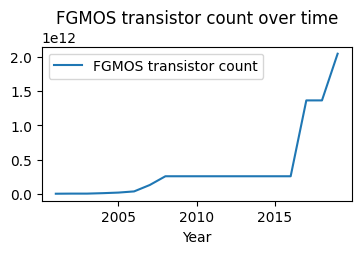

In [139]:
flash = pd.read_csv(f'{DATASETS_FOLDER}/flash.csv')
#
print('# Original data')
display(flash.tail())
#
flash = keep_columns(flash, ['FGMOS transistor count', 'Date of introduction'])
flash = date_to_year(flash, 'Date of introduction')
flash = remove_commas(flash)
flash = convert_to_float(flash, ['FGMOS transistor count'])
flash = cut_add_years(flash)
flash = keep_highest_per_year(flash, 'FGMOS transistor count')
flash = flash.fillna(method='ffill')
computer_dfs.append(flash)
#
print('# Cleaned data')
display(flash.tail())
display(flash.describe())
flash.plot(x=DATE_COLUMN, y='FGMOS transistor count', title='FGMOS transistor count over time', figsize=(4, 2))
plt.show()

FPGA

# Original data


,FPGA,Transistor count,Date of introduction,Designer,Manufacturer,Process,Area,"Transistor density, tr./mm2",Ref
11,Virtex-Ultrascale VU440,"20,000,000,000",Q1 2015,Xilinx,TSMC,20 nm,NaN,NaN,NaN
12,Virtex-Ultrascale+ VU19P,"35,000,000,000",2020,Xilinx,TSMC,16 nm,900 mm2,"38,900,000",NaN
13,Versal VC1902,"37,000,000,000",2H 2019,Xilinx,TSMC,7 nm,NaN,NaN,NaN
14,Stratix 10 GX 10M,"43,300,000,000",Q4 2019,Intel,Intel,14 nm,"1,400 mm2","30,930,000",NaN
15,Versal VP1802,"92,000,000,000",2021 ?,Xilinx,TSMC,7 nm,NaN,NaN,NaN


# Cleaned data


/tmp/ipykernel_6563/3484873384.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[date_column] = df[date_column].apply(lambda x: re.findall(year_pattern, x)[0])


,FPGA transistor count,Year
15,2.000000e+10,2016
16,2.000000e+10,2017
17,2.000000e+10,2018
18,4.330000e+10,2019
19,3.500000e+10,2020


,FPGA transistor count,Year
count,1.900000e+01,20.00000
mean,1.034526e+10,2010.50000
std,1.259800e+10,5.91608
min,4.300000e+08,2001.00000
25%,1.100000e+09,2005.75000
50%,5.300000e+09,2010.50000
75%,2.000000e+10,2015.25000
max,4.330000e+10,2020.00000


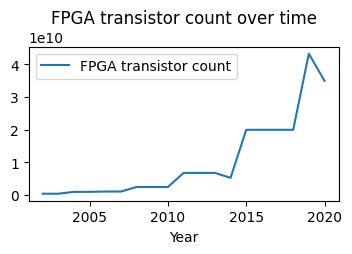

In [140]:
fpga = pd.read_csv(f'{DATASETS_FOLDER}/fpga.csv')
#
print('# Original data')
display(fpga.tail())
#
fpga = keep_columns(fpga, ['Transistor count', 'Date of introduction'])
fpga = date_to_year(fpga, 'Date of introduction')
fpga = remove_commas(fpga)
fpga = convert_to_float(fpga, ['Transistor count'])
fpga = cut_add_years(fpga)
fpga = fpga.rename(columns={'Transistor count': 'FPGA transistor count'})
fpga = keep_highest_per_year(fpga, 'FPGA transistor count')
fpga = fpga.fillna(method='ffill')
computer_dfs.append(fpga)
#
print('# Cleaned data')
display(fpga.tail())
display(fpga.describe())
fpga.plot(x=DATE_COLUMN, y='FPGA transistor count', title='FPGA transistor count over time', figsize=(4, 2))
plt.show()

GPU

# Original data


,Processor,Transistor count,Year,Designer(s),Fab(s),Process,Area,"Transistor density, tr./mm2",Ref
158,AD102 Ada Lovelace,"76,300,000,000",2022,Nvidia,TSMC,4 nm,608.4 mm²,"125,411,000",NaN
159,AD103 Ada Lovelace,"45,900,000,000",2022,Nvidia,TSMC,4 nm,378.6 mm²,"121,240,000",NaN
160,AD104 Ada Lovelace,"35,800,000,000",2022,Nvidia,TSMC,4 nm,294.5 mm²,"121,560,000",NaN
161,Navi 31 RDNA3,"58,000,000,000",2022,AMD,TSMC,5 nm (GCD) 6 nm (MCD),531 mm² (MCM) 306 mm² (GCD) 6×37.5 mm² (MCD),"109,200,000 (MCM) 132,400,000 (GCD)",NaN
162,Navi 33 RDNA3,"13,300,000,000",2023,AMD,TSMC,6 nm,204 mm²,"65,200,000",NaN


# Cleaned data


,GPU transistor count,Year
15,1.530000e+10,2016
16,2.110000e+10,2017
17,1.860000e+10,2018
18,1.030000e+10,2019
19,5.420000e+10,2020


,GPU transistor count,Year
count,2.000000e+01,20.00000
mean,8.016336e+09,2010.50000
std,1.260009e+10,5.91608
min,6.000000e+07,2001.00000
25%,5.910000e+08,2005.75000
50%,3.756356e+09,2010.50000
75%,9.250000e+09,2015.25000
max,5.420000e+10,2020.00000


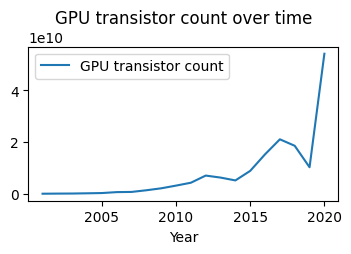

In [141]:
gpus = pd.read_csv(f'{DATASETS_FOLDER}/gpus.csv')
#
print('# Original data')
display(gpus.tail())
#
gpus = keep_columns(gpus, ['Transistor count', 'Year'])
gpus = date_to_year(gpus, 'Year')
gpus = remove_commas(gpus)
gpus = convert_to_float(gpus, ['Transistor count'])
gpus = cut_add_years(gpus)
gpus = gpus.rename(columns={'Transistor count': 'GPU transistor count'})
gpus = keep_highest_per_year(gpus, 'GPU transistor count')
gpus = gpus.fillna(method='ffill')
computer_dfs.append(gpus)
#
print('# Cleaned data')
display(gpus.tail())
display(gpus.describe())
gpus.plot(x='Year', y='GPU transistor count', title='GPU transistor count over time', figsize=(4, 2))
plt.show()

Microprocessor

# Original data


,Processor,Transistor count,Year,Designer,Process\n(nm),Area (mm2),"Transistor density, tr./mm2"
229,AMD EPYC Genoa (4th gen/9004 series) 13-chip m...,"90,000,000,000",2022,AMD,5 nm (CCD)\n6 nm (IOD),"1,263.34 mm²\n12×72.225 (CCD)\n396.64 (IOD)","71,240,000"
230,Sapphire Rapids quad-chip module (up to 60 cor...,"44,000,000,000–48,000,000,000",2023,Intel,Intel 7 (10 nm ESF),"1,600 mm2","27,500,000–\n30,000,000"
231,"Apple M2 Pro (12-core 64-bit ARM64 SoC, SIMD, ...","40,000,000,000",2023,Apple,5 nm,?,?
232,"Apple M2 Max (12-core 64-bit ARM64 SoC, SIMD, ...","67,000,000,000",2023,Apple,5 nm,?,?
233,Processor,Transistor count,Year,Designer,Process\n(nm),Area (mm2),"Transistor density, tr./mm2"


# Cleaned data


/tmp/ipykernel_6563/3484873384.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[date_column] = df[date_column].apply(lambda x: re.findall(year_pattern, x)[0])


,Microprocessor transistor count,Year
15,8000000000,2016
16,19200000000,2017
17,10000000000,2018
18,39540000000,2019
19,16000000000,2020


,Microprocessor transistor count,Year
count,2.000000e+01,20.00000
mean,6.507800e+09,2010.50000
std,9.477374e+09,5.91608
min,1.910000e+08,2001.00000
25%,7.397500e+08,2005.75000
50%,2.450000e+09,2010.50000
75%,8.500000e+09,2015.25000
max,3.954000e+10,2020.00000


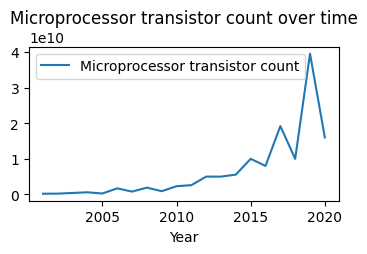

In [142]:
microprocessors = pd.read_csv(f'{DATASETS_FOLDER}/microprocessors.csv')
#
print('# Original data')
display(microprocessors.tail())
#
microprocessors = keep_columns(microprocessors, ['Transistor count', 'Year'])
microprocessors = date_to_year(microprocessors, 'Year')
microprocessors = remove_commas(microprocessors)
microprocessors = microprocessors[microprocessors['Transistor count'].str.contains(r'^\d+$')]
microprocessors = convert_to_float(microprocessors, ['Transistor count'])
microprocessors = microprocessors.rename(columns={'Transistor count': 'Microprocessor transistor count'})
microprocessors = cut_add_years(microprocessors)
microprocessors = keep_highest_per_year(microprocessors, 'Microprocessor transistor count')
microprocessors = microprocessors.fillna(method='ffill')
computer_dfs.append(microprocessors)
#
print('# Cleaned data')
display(microprocessors.tail())
display(microprocessors.describe())
microprocessors.plot(x='Year', y='Microprocessor transistor count', title='Microprocessor transistor count over time', figsize=(4, 2))
plt.show()


RAM

Note that we will drop this dataset because contains a lot of NaN values

# Original data


,Chip name,Capacity (bits),RAM type,Transistor count,Date of introduction,Manufacturer(s),Process,Area,"Transistor density, tr./mm2",Ref
43,?,16 Gb,SDRAM (DDR3),"17,179,869,184",2008,Samsung,50 nm,?,?,NaN
44,?,32 Gb,SDRAM (HBM2),"34,359,738,368",2016,Samsung,20 nm,?,?,NaN
45,?,64 Gb,SDRAM (HBM2),"68,719,476,736",2017,Samsung,20 nm,?,?,NaN
46,?,128 Gb,SDRAM (DDR4),"137,438,953,472",2018,Samsung,10 nm,?,?,NaN
47,?,?,RRAM (3DSoC),?,2019,SkyWater Technology,90 nm,?,?,NaN


# Cleaned data


,Year,RAM transistor count
14,2015,1.717987e+10
15,2016,3.435974e+10
16,2017,6.871948e+10
17,2018,1.374390e+11
18,2019,1.374390e+11


,Year,RAM transistor count
count,19.000000,1.200000e+01
mean,2010.000000,4.294967e+10
std,5.627314,4.661933e+10
min,2001.000000,1.717987e+10
25%,2005.500000,1.717987e+10
50%,2010.000000,1.717987e+10
75%,2014.500000,4.294967e+10
max,2019.000000,1.374390e+11


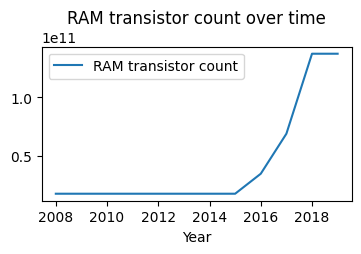

In [143]:
ram = pd.read_csv(f'{DATASETS_FOLDER}/ram.csv')
#
print('# Original data')
display(ram.tail())
#
ram = keep_columns(ram, ['Date of introduction', 'Transistor count'])
ram = date_to_year(ram, 'Date of introduction')
ram = remove_commas(ram)
ram = convert_to_float(ram, ['Transistor count'])
ram = ram.rename(columns={'Transistor count': 'RAM transistor count'})
ram = cut_add_years(ram)
ram = keep_highest_per_year(ram, 'RAM transistor count')
ram = ram.fillna(method='ffill')
# BAD: computer_dfs.append(ram) this dataset has a lot of Nan values
# show
print('# Cleaned data')
display(ram.tail())
display(ram.describe())
ram.plot(x='Year', y='RAM transistor count', title='RAM transistor count over time', figsize=(4, 2))
plt.show()

ROM

Note that we will drop this data since this lack of data from 2000s up to now

# Original data


,Chip name,Capacity (bits),ROM type,Transistor count,Date of introduction,Manufacturer(s),Process,Area,Ref
17,27512,512 Kb,EPROM (HMOS),"524,288",1984,Intel,?,?,NaN
18,?,1 Mb,EPROM (CMOS),"1,048,576",1984,NEC,"1,200 nm",?,NaN
19,?,4 Mb,EPROM (CMOS),"4,194,304",1987,Toshiba,800 nm,?,NaN
20,?,16 Mb,EPROM (CMOS),"16,777,216",1990,NEC,600 nm,?,NaN
21,?,16 Mb,MROM,"16,777,216",1995,"AKM, Hitachi",?,?,NaN


# Cleaned data


,Year,ROM transistor count
14,2015,NaN
15,2016,NaN
16,2017,NaN
17,2018,NaN
18,2019,NaN


,Year,ROM transistor count
count,19.000000,0.0
mean,2010.000000,NaN
std,5.627314,NaN
min,2001.000000,NaN
25%,2005.500000,NaN
50%,2010.000000,NaN
75%,2014.500000,NaN
max,2019.000000,NaN


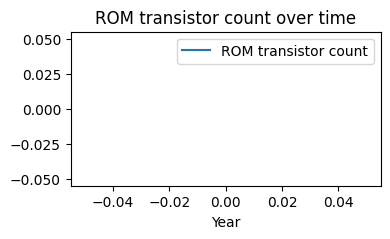

In [144]:
rom = pd.read_csv(f'{DATASETS_FOLDER}/rom.csv')
#
print('# Original data')
display(rom.tail())
#
rom = keep_columns(rom, ['Date of introduction', 'Transistor count'])
rom = date_to_year(rom, 'Date of introduction')
rom = remove_commas(rom)
rom = convert_to_float(rom, ['Transistor count'])
rom = rom.rename(columns={'Transistor count': 'ROM transistor count'})
rom = cut_add_years(rom)
rom = keep_highest_per_year(rom, 'ROM transistor count')
rom = rom.fillna(method='ffill')
# BAD: computer_dfs.append(rom) this lacks data from 2000 up to now
# show
print('# Cleaned data')
display(rom.tail())
display(rom.describe())
rom.plot(x='Year', y='ROM transistor count', title='ROM transistor count over time', figsize=(4, 2))
plt.show()

Internet

# Original data


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
261,Kosovo,XKX,Individuals using the Internet (% of population),IT.NET.USER.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,83.893597,89.443032,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",YEM,Individuals using the Internet (% of population),IT.NET.USER.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,22.55000,24.085409,24.579208,26.718355,NaN,NaN,NaN,NaN,NaN,NaN
263,South Africa,ZAF,Individuals using the Internet (% of population),IT.NET.USER.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,49.00000,51.919116,54.000000,56.167394,62.400000,69.696875,70.320310,72.310492,NaN,NaN
264,Zambia,ZMB,Individuals using the Internet (% of population),IT.NET.USER.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,6.50000,8.800000,10.300000,12.200000,14.299997,16.800000,18.051915,21.231531,NaN,NaN
265,Zimbabwe,ZWE,Individuals using the Internet (% of population),IT.NET.USER.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,16.36474,22.742818,23.119989,24.400000,25.000000,26.588274,29.298565,34.813971,NaN,NaN


# Cleaned data


,Year,US internet percentage
56,2016,85.544421
57,2017,87.274889
58,2018,88.498903
59,2019,89.430285
60,2020,90.620470


,Year,US internet percentage
count,20.00000,20.000000
mean,2010.50000,73.383174
std,5.91608,10.809027
min,2001.00000,49.080832
25%,2005.75000,68.690408
50%,2010.50000,72.345000
75%,2015.25000,77.636105
max,2020.00000,90.620470


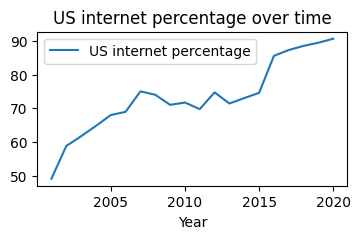

In [145]:
internet = pd.read_csv(f'{DATASETS_FOLDER}/theworldbank_internet.csv')
#
print('# Original data')
display(internet.tail())
#
internet = year_column_to_row(internet, 'United States', 'US internet percentage')
internet = cut_add_years(internet)
computer_dfs.append(internet)
#
print('# Cleaned data')
display(internet.tail())
display(internet.describe())
internet.plot(x='Year', y='US internet percentage', title='US internet percentage over time', figsize=(4, 2))
plt.show()

In [146]:
## TODO: add phones related data

In [147]:
## TODO: add AI related data

In [148]:
## TODO: add SSD related data

Merge all computing advances into a single dataframe

In [149]:
computer_advances = merge_by_year(computer_dfs)
# Review if computer advances final dataframe were correctly merged
computer_advances.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             20 non-null     int64  
 1   FGMOS transistor count           19 non-null     float64
 2   FPGA transistor count            19 non-null     float64
 3   GPU transistor count             20 non-null     float64
 4   Microprocessor transistor count  20 non-null     int64  
 5   US internet percentage           20 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 1.1 KB


### Reviewing the United States economy

Population, GDP and internet datasets were obtained from [worldbank.org](https://data.worldbank.org/).

Population

# Original data


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
261,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1788878.0,1790133.0,1786038.0,NaN
262,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5542459.0,5646668.0,5753386.0,5860197.0,5973803.0,6097298.0,...,26984002.0,27753304.0,28516545.0,29274002.0,30034389.0,30790513.0,31546691.0,32284046.0,32981641.0,NaN
263,South Africa,ZAF,"Population, total",SP.POP.TOTL,16520441.0,16989464.0,17503133.0,18042215.0,18603097.0,19187194.0,...,53873616.0,54729551.0,55876504.0,56422274.0,56641209.0,57339635.0,58087055.0,58801927.0,59392255.0,NaN
264,Zambia,ZMB,"Population, total",SP.POP.TOTL,3119430.0,3219451.0,3323427.0,3431381.0,3542764.0,3658024.0,...,15234976.0,15737793.0,16248230.0,16767761.0,17298054.0,17835893.0,18380477.0,18927715.0,19473125.0,NaN
265,Zimbabwe,ZWE,"Population, total",SP.POP.TOTL,3806310.0,3925952.0,4049778.0,4177931.0,4310332.0,4447149.0,...,13555422.0,13855753.0,14154937.0,14452704.0,14751101.0,15052184.0,15354608.0,15669666.0,15993524.0,NaN


# Cleaned data


,Year,US Population
56,2016,323071755.0
57,2017,325122128.0
58,2018,326838199.0
59,2019,328329953.0
60,2020,331501080.0


,Year,US Population
count,20.00000,2.000000e+01
mean,2010.50000,3.093169e+08
std,5.91608,1.450577e+07
min,2001.00000,2.849690e+08
25%,2005.75000,2.976641e+08
50%,2010.50000,3.104553e+08
75%,2015.25000,3.213222e+08
max,2020.00000,3.315011e+08


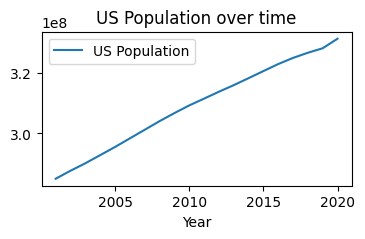

In [150]:
population = pd.read_csv(f'{DATASETS_FOLDER}/theworldbank_population.csv')
#
print('# Original data')
display(population.tail())
#
population = year_column_to_row(population, 'United States', 'US Population')
population = cut_add_years(population)
#
print('# Cleaned data')
display(population.tail())
display(population.describe())
population.plot(x='Year', y='US Population', title='US Population over time', figsize=(4, 2))
plt.show()

GDP

# Original data


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
261,Kosovo,XKX,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,6.735731e+09,7.074658e+09,6.295820e+09,6.682833e+09,7.180813e+09,7.878509e+09,7.899879e+09,7.716925e+09,9.412034e+09,NaN
262,"Yemen, Rep.",YEM,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.041523e+10,4.322859e+10,4.244450e+10,3.131783e+10,2.684223e+10,2.160616e+10,NaN,NaN,NaN,NaN
263,South Africa,ZAF,GDP (current US$),NY.GDP.MKTP.CD,8.748597e+09,9.225996e+09,9.813996e+09,1.085420e+10,1.195600e+10,1.306899e+10,...,4.008860e+11,3.811989e+11,3.467098e+11,3.235855e+11,3.814488e+11,4.041597e+11,3.885320e+11,3.376197e+11,4.190150e+11,NaN
264,Zambia,ZMB,GDP (current US$),NY.GDP.MKTP.CD,7.130000e+08,6.962857e+08,6.931429e+08,7.187143e+08,8.394286e+08,1.082857e+09,...,2.803724e+10,2.714102e+10,2.125122e+10,2.095841e+10,2.587360e+10,2.631159e+10,2.330867e+10,1.811063e+10,2.214763e+10,NaN
265,Zimbabwe,ZWE,GDP (current US$),NY.GDP.MKTP.CD,1.052990e+09,1.096647e+09,1.117602e+09,1.159512e+09,1.217138e+09,1.311436e+09,...,1.909102e+10,1.949552e+10,1.996312e+10,2.054868e+10,1.758489e+10,3.415607e+10,2.183223e+10,2.150970e+10,2.837124e+10,NaN


# Cleaned data


,Year,US GDP
56,2016,1.869511e+13
57,2017,1.947734e+13
58,2018,2.053306e+13
59,2019,2.138098e+13
60,2020,2.106047e+13


,Year,US GDP
count,20.00000,2.000000e+01
mean,2010.50000,1.582056e+13
std,5.91608,3.345485e+12
min,2001.00000,1.058193e+13
25%,2005.75000,1.362149e+13
50%,2010.50000,1.532435e+13
75%,2015.25000,1.832829e+13
max,2020.00000,2.138098e+13


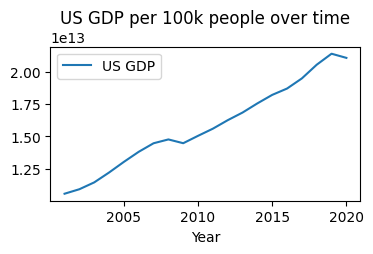

In [151]:
gdp = pd.read_csv(f'{DATASETS_FOLDER}/theworldbank_gdp.csv')
#
print('# Original data')
display(gdp.tail())
#
gdp = year_column_to_row(gdp, 'United States', 'US GDP')
gdp = cut_add_years(gdp)
gdp = normalize_with_population(gdp, 'US GDP')
#
print('# Cleaned data')
display(gdp.tail())
display(gdp.describe())
gdp.plot(x='Year', y='US GDP', title='US GDP per 100k people over time', figsize=(4, 2))
plt.show()

In [152]:
economy = merge_by_year([gdp, population])
# Review if economy final dataframe were correctly merged
economy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           20 non-null     int64  
 1   US GDP         20 non-null     float64
 2   US Population  20 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 640.0 bytes


### Reviewing real estate sales

US 2001-2020 real state sales dataset was obtained from [data.gov](https://catalog.data.gov/dataset/real-estate-sales-2001-2018).

In [153]:
real_estate_sales = pd.read_csv(f'{DATASETS_FOLDER}/real_estate_sales.csv')
#
print('# Original data')
display(real_estate_sales.tail())
#
real_estate_sales = keep_columns(real_estate_sales, [
    'Date Recorded', 'Sale Amount', 'Property Type', 'Residential Type',
    ])
# Save cleaned data because github doesn't allow files larger than 100MB
if SAVE_CLEANED_DATA:
    real_estate_sales.to_csv(f'{DATASETS_FOLDER}/real_estate_sales.csv', index=False)
real_estate_sales = date_to_year(real_estate_sales, 'Date Recorded')
#
print('# Cleaned data')
display(real_estate_sales.tail())
display(real_estate_sales.describe())

# Original data


/tmp/ipykernel_6563/1021896824.py:1: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  real_estate_sales = pd.read_csv(f'{DATASETS_FOLDER}/real_estate_sales.csv')


,Date Recorded,Sale Amount,Property Type,Residential Type
997208,06/24/2020,53100.0,Single Family,Single Family
997209,11/27/2019,76000.0,Single Family,Single Family
997210,04/27/2020,210000.0,Single Family,Single Family
997211,06/03/2020,280000.0,Single Family,Single Family
997212,12/20/2019,7450000.0,NaN,NaN


/tmp/ipykernel_6563/3484873384.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[date_column] = df[date_column].apply(lambda x: re.findall(year_pattern, x)[0])


# Cleaned data


,Year,Sale Amount,Property Type,Residential Type
997208,2020,53100.0,Single Family,Single Family
997209,2019,76000.0,Single Family,Single Family
997210,2020,210000.0,Single Family,Single Family
997211,2020,280000.0,Single Family,Single Family
997212,2019,7450000.0,NaN,NaN


,Sale Amount
count,9.972110e+05
mean,3.911520e+05
std,5.347276e+06
min,0.000000e+00
25%,1.400000e+05
50%,2.250000e+05
75%,3.650000e+05
max,5.000000e+09


Sales per year

,Year,re sales
1,2001,60207
2,2002,56317
3,2003,73943
4,2004,79566
5,2005,57250
6,2006,46138
7,2007,34195
8,2008,36305
9,2009,39128
10,2010,32088


,Year,re sales
count,20.00000,20.000000
mean,2010.50000,47438.450000
std,5.91608,15192.165091
min,2001.00000,14291.000000
25%,2005.75000,37211.000000
50%,2010.50000,47388.000000
75%,2015.25000,56550.250000
max,2020.00000,79566.000000


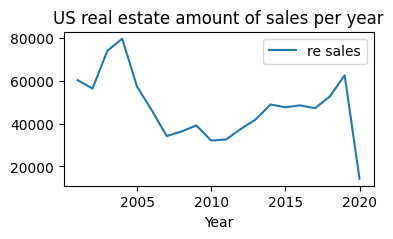

In [154]:
# Calculate
re_sales_per_year = pd.DataFrame()
re_sales_per_year['Year'] = real_estate_sales[DATE_COLUMN].unique()
re_sales_per_year = ensure_date_type(re_sales_per_year)
re_sales_per_year['re sales'] = real_estate_sales.groupby(DATE_COLUMN).size().values
re_sales_per_year = cut_add_years(re_sales_per_year)
re_sales_per_year = re_sales_per_year.fillna(method='ffill')
re_sales_per_year = normalize_with_population(re_sales_per_year, 're sales')
# Show
display(re_sales_per_year) # we show all the data because it's not too much
display(re_sales_per_year.describe())
re_sales_per_year.plot(
    x=DATE_COLUMN,
    y='re sales',
    title='US real estate amount of sales per year',
    figsize=(4, 2)
    )
plt.show()

Invested per year

,Year,re investment
1,2001,1.560357e+10
2,2002,1.720434e+10
3,2003,2.516201e+10
4,2004,3.021333e+10
5,2005,2.159822e+10
6,2006,2.222218e+10
7,2007,1.412136e+10
8,2008,1.177615e+10
9,2009,1.383911e+10
10,2010,1.104590e+10


,Year,re investment
count,20.00000,2.000000e+01
mean,2010.50000,1.791407e+10
std,5.91608,6.191910e+09
min,2001.00000,3.178363e+09
25%,2005.75000,1.405080e+10
50%,2010.50000,1.782573e+10
75%,2015.25000,2.175421e+10
max,2020.00000,3.021333e+10


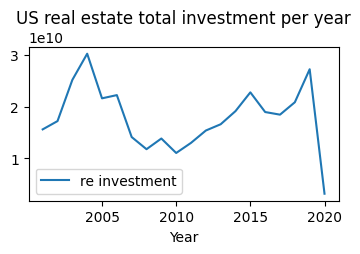

In [155]:
# Calculate
re_investment_per_year = pd.DataFrame()
re_investment_per_year['Year'] = real_estate_sales[DATE_COLUMN].unique()
re_investment_per_year = ensure_date_type(re_investment_per_year)
re_investment_per_year['re investment'] = real_estate_sales.groupby(DATE_COLUMN)['Sale Amount'].sum().values
re_investment_per_year = cut_add_years(re_investment_per_year)
re_investment_per_year = normalize_with_population(re_investment_per_year, 're investment')
# Show
display(re_investment_per_year) # we show all the data because it's not too much
display(re_investment_per_year.describe())
re_investment_per_year.plot(
    x=DATE_COLUMN,
    y='re investment',
    title='US real estate total investment per year',
    figsize=(4, 2)
    )
plt.show()

Investment per type per year

In [156]:
def get_types(df:pd.DataFrame, column:str) -> list:
    types = df[column].unique()
    types = [str(x) for x in types]
    return types
def print_types(df: pd.DataFrame, column:str) -> None:
    types = get_types(df, column)
    for i, x in enumerate(types):
        print(f'{i+1}.\t{x}')
print('Real estate properties types:')
print_types(real_estate_sales, 'Property Type')
print()
print('Real estate residential types:')
print_types(real_estate_sales, 'Residential Type')

Real estate properties types:
1.	Commercial
2.	Residential
3.	Vacant Land
4.	nan
5.	Apartments
6.	Industrial
7.	Public Utility
8.	Condo
9.	Two Family
10.	Three Family
11.	Single Family
12.	Four Family

Real estate residential types:
1.	nan
2.	Single Family
3.	Condo
4.	Two Family
5.	Three Family
6.	Four Family


<Axes: title={'center': 'Residential types'}, ylabel='Residential Type'>

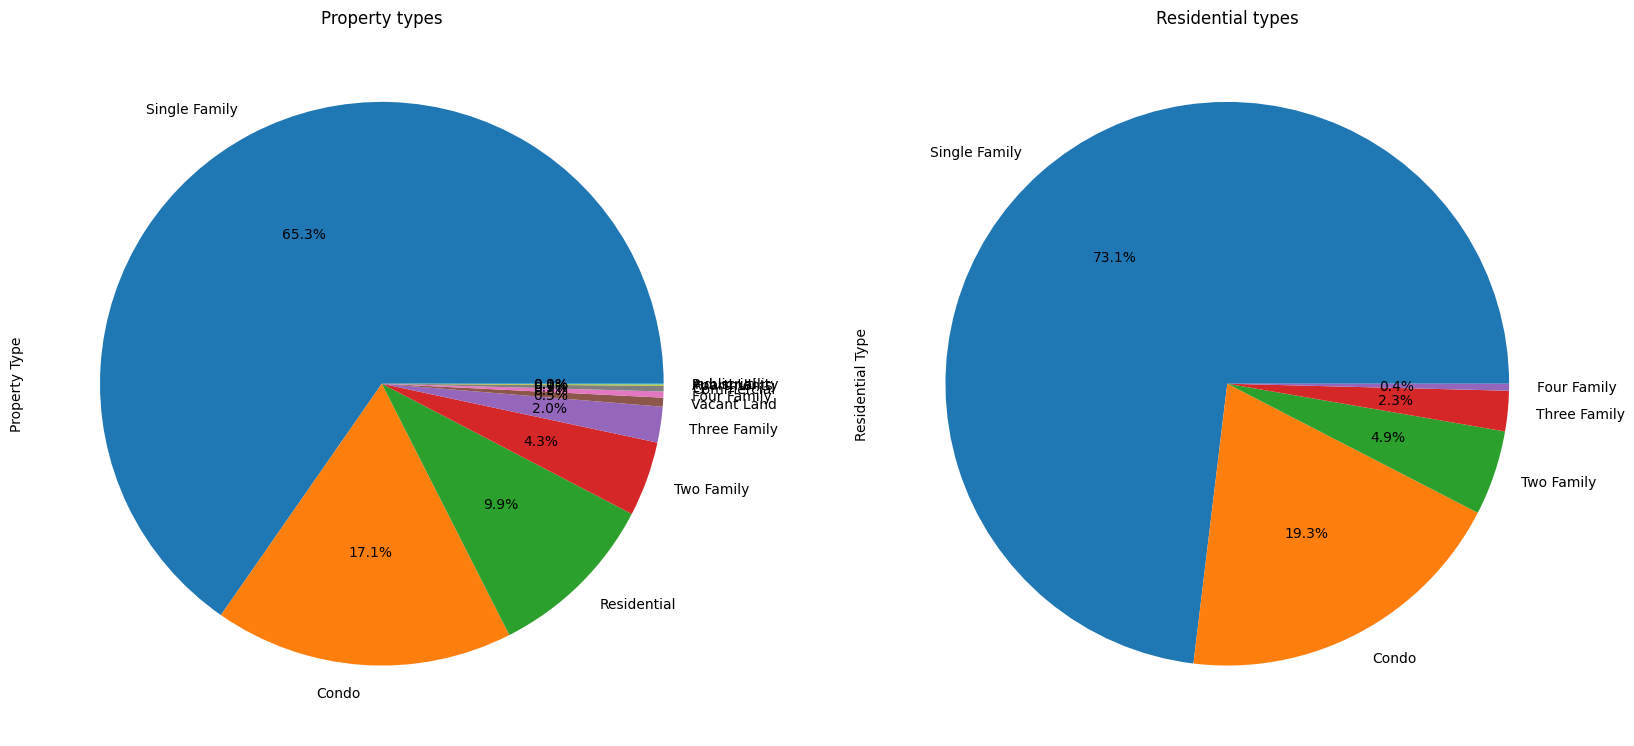

In [157]:
fig, axs = plt.subplots(1, 2, figsize=(20, 20))
real_estate_sales['Property Type'] \
    .value_counts(normalize=True).plot.pie(autopct='%1.1f%%', title='Property types', ax=axs[0])
real_estate_sales['Residential Type'] \
    .value_counts(normalize=True).plot.pie(autopct='%1.1f%%', title='Residential types', ax=axs[1])

Property sales


,Year,re CONDO investment,re TWO FAMILY investment,re THREE FAMILY investment,re SINGLE FAMILY investment,re FOUR FAMILY investment
0,1999,9.500000e+04,0.000000e+00,0,0.000000e+00,0
1,2001,8.800000e+04,0.000000e+00,0,2.402711e+06,0
2,2002,0.000000e+00,0.000000e+00,0,0.000000e+00,0
3,2003,0.000000e+00,0.000000e+00,0,1.589000e+05,0
4,2004,6.329000e+05,0.000000e+00,0,1.949900e+06,0
5,2005,2.770000e+05,2.640000e+05,0,0.000000e+00,0
6,2006,5.948589e+08,1.603019e+08,86599217,3.210213e+09,10182700
7,2007,2.423580e+09,5.385773e+08,228334313,1.455175e+10,25293008
8,2008,1.571634e+09,3.353331e+08,134461433,9.249377e+09,23560218
9,2009,1.533074e+09,2.929898e+08,115687933,8.241461e+09,21736964


,Year,re CONDO investment,re TWO FAMILY investment,re THREE FAMILY investment,re SINGLE FAMILY investment,re FOUR FAMILY investment
count,22.000000,2.200000e+01,2.200000e+01,2.200000e+01,2.200000e+01,2.200000e+01
mean,2010.454545,1.246884e+09,2.389259e+08,1.028874e+08,7.092363e+09,3.071481e+07
std,6.573593,1.062153e+09,1.941756e+08,8.514759e+07,5.469519e+09,4.391946e+07
min,1999.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2005.250000,3.659750e+05,6.600000e+04,0.000000e+00,2.063103e+06,0.000000e+00
50%,2010.500000,1.483280e+09,2.743252e+08,1.112477e+08,9.254865e+09,2.264859e+07
75%,2015.750000,1.882366e+09,3.626263e+08,1.470617e+08,1.153239e+10,3.554375e+07
max,2021.000000,3.894486e+09,5.949037e+08,2.785386e+08,1.455175e+10,2.021107e+08


Residential sales


,Year,re SINGLE FAMILY investment,re CONDO investment,re TWO FAMILY investment,re THREE FAMILY investment,re FOUR FAMILY investment
0,1999,0.000000e+00,9.500000e+04,0.000000e+00,0.000000e+00,0
1,2001,2.402711e+06,8.800000e+04,0.000000e+00,0.000000e+00,0
2,2002,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0
3,2003,1.589000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0
4,2004,1.949900e+06,6.329000e+05,0.000000e+00,0.000000e+00,0
5,2005,0.000000e+00,2.770000e+05,2.640000e+05,0.000000e+00,0
6,2006,3.210213e+09,5.948589e+08,1.603019e+08,8.659922e+07,10182700
7,2007,1.455175e+10,2.423580e+09,5.385773e+08,2.283343e+08,25293008
8,2008,9.249377e+09,1.571634e+09,3.353331e+08,1.344614e+08,23560218
9,2009,8.241461e+09,1.533074e+09,2.929898e+08,1.156879e+08,21736964


,Year,re SINGLE FAMILY investment,re CONDO investment,re TWO FAMILY investment,re THREE FAMILY investment,re FOUR FAMILY investment
count,22.000000,2.200000e+01,2.200000e+01,2.200000e+01,2.200000e+01,2.200000e+01
mean,2010.454545,8.107186e+09,1.484264e+09,2.785342e+08,1.303744e+08,3.461387e+07
std,6.573593,5.992677e+09,1.238747e+09,2.187378e+08,1.234736e+08,4.731333e+07
min,1999.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2005.250000,8.043554e+08,1.491894e+08,4.027347e+07,2.164980e+07,2.545675e+06
50%,2010.500000,9.596959e+09,1.552354e+09,2.969957e+08,1.189867e+08,2.393895e+07
75%,2015.750000,1.208612e+10,2.038284e+09,3.975201e+08,1.520068e+08,3.887281e+07
max,2021.000000,1.953491e+10,4.375425e+09,6.710182e+08,5.073493e+08,2.198216e+08


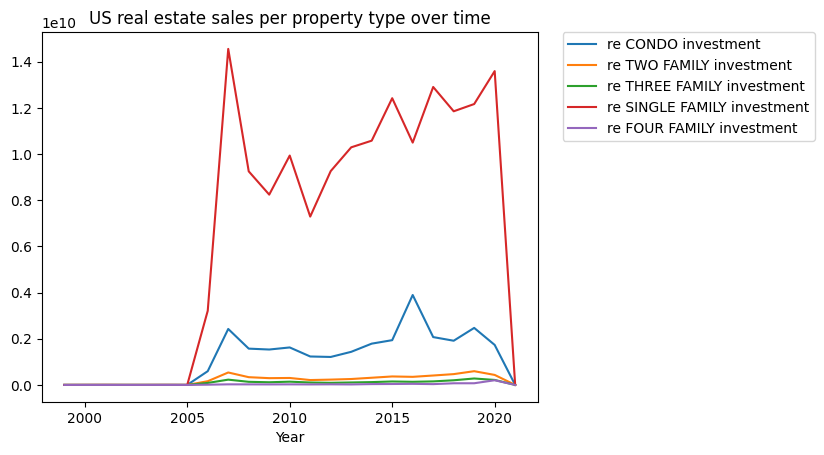

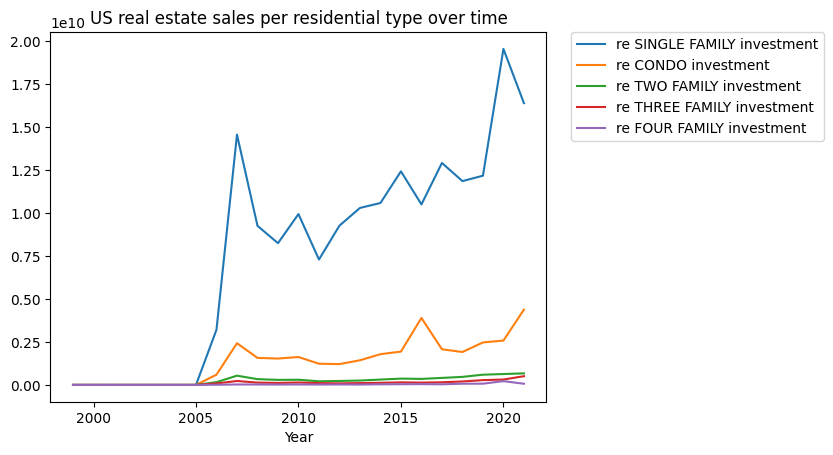

In [158]:
def groupby_type_and_year(df:pd.DataFrame, column:str) -> pd.DataFrame:
    result = pd.DataFrame()
    result['Year'] = real_estate_sales[DATE_COLUMN].unique()
    result = result.sort_values(by=DATE_COLUMN).reset_index(drop=True)
    #
    result = ensure_date_type(result)
    df = ensure_date_type(df)
    #
    for type in get_types(df, column):
        new_column_name = f're {type.upper()} investment'
        result[new_column_name] = 0
        for year in result[DATE_COLUMN]:
            sales_amount = df[(df[column] == type) & (df[DATE_COLUMN] == year)]['Sale Amount'].sum()
            result.loc[result[DATE_COLUMN] == year, new_column_name] = sales_amount
        result = normalize_with_population(result, new_column_name)
    return result

property_types_annual = groupby_type_and_year(real_estate_sales, 'Property Type')
residential_types_annual = groupby_type_and_year(real_estate_sales, 'Residential Type')

# Drop columns with lot of zeros.
property_types_annual = keep_columns(property_types_annual, [
    DATE_COLUMN,
    're CONDO investment',
    're TWO FAMILY investment',
    're THREE FAMILY investment',
    're SINGLE FAMILY investment',
    're FOUR FAMILY investment',
])
residential_types_annual = keep_columns(residential_types_annual, [
    DATE_COLUMN,
    're SINGLE FAMILY investment',
    're CONDO investment',
    're TWO FAMILY investment',
    're THREE FAMILY investment',
    're FOUR FAMILY investment',
])

print("Property sales")
display(property_types_annual)
display(property_types_annual.describe())
print("Residential sales")
display(residential_types_annual)
display(residential_types_annual.describe())

# Show property types
property_types_annual.plot(
    x=DATE_COLUMN,
    y=property_types_annual.columns[1:],
    title='US real estate sales per property type over time',
    )
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

# Show residential types
residential_types_annual.plot(
    x=DATE_COLUMN,
    y=residential_types_annual.columns[1:],
    title='US real estate sales per residential type over time',
    )
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

we will discard residential real estate sales because it is very similar to property sales.

In [159]:
real_estate = merge_by_year([
    re_sales_per_year, property_types_annual, re_investment_per_year,
    ])
# Review if final real estate dataframe were correctly merged
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 1 to 20
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         20 non-null     int64  
 1   re sales                     20 non-null     float64
 2   re CONDO investment          20 non-null     float64
 3   re TWO FAMILY investment     20 non-null     float64
 4   re THREE FAMILY investment   20 non-null     int64  
 5   re SINGLE FAMILY investment  20 non-null     float64
 6   re FOUR FAMILY investment    20 non-null     int64  
 7   re investment                20 non-null     float64
dtypes: float64(5), int64(3)
memory usage: 1.4 KB


### Reviewing the U.S. crude oil production

U.S. field production of crude oil data were obtained from [U.S. Energy Information Administration](https://www.eia.gov/dnav/pet/hist/LeafHandler.ashx?n=pet&s=mcrfpus2&f=m).

# Original data


,Year,U.S. Field Production of Crude Oil Thousand Barrels per Day
159,1863,7
160,1862,8
161,1861,6
162,1860,1
163,1859,0


# Cleaned data


,Year,Crude Oil Production
142,2001,5801
143,2002,5744
144,2003,5649
145,2004,5441
146,2005,5184
147,2006,5086
148,2007,5074
149,2008,5000
150,2009,5357
151,2010,5484


,Year,Crude Oil Production
count,20.00000,20.000000
mean,2010.50000,7227.150000
std,5.91608,2393.169299
min,2001.00000,5000.000000
25%,2005.75000,5420.000000
50%,2010.50000,5772.500000
75%,2015.25000,8975.750000
max,2020.00000,12315.000000


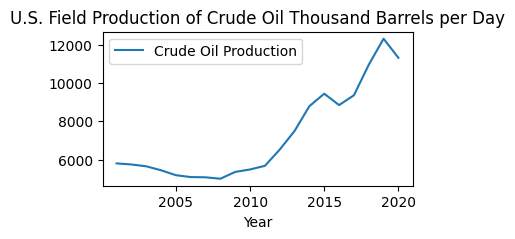

In [160]:
crude = pd.read_csv(f'{DATASETS_FOLDER}/U.S._Field_Production_of_Crude_Oil.csv')
#
print('# Original data')
display(crude.tail())
#
crude = cut_add_years(crude)
crude = crude.rename(columns={
    'U.S. Field Production of Crude Oil Thousand Barrels per Day': 'Crude Oil Production',
})
crude = normalize_with_population(crude, 'Crude Oil Production')
#
print('# Cleaned data')
display(crude) # we show all the data because it's not too much
display(crude.describe())
crude.plot(x='Year', y='Crude Oil Production', title='U.S. Field Production of Crude Oil Thousand Barrels per Day', figsize=(4, 2))
plt.show()

### Reviewing book publishing

Book dataset were obtained from [scostap - Goodreads Best Book Ever dataset](https://github.com/scostap/goodreads_bbe_dataset), as the data was scraped by the author, we will analyze outliers and more.

In [161]:
book = pd.read_csv(f'{DATASETS_FOLDER}/books_1.Best_Books_Ever.csv')
#
print('# Original data')
display(book.tail())
#
book = keep_columns(book, [
    'bookFormat', 'pages', 'publishDate', 'rating', 'likedPercent', 'price'
    ])
book = book.dropna()
# Format date
book = book[book['publishDate'].str.match(r'\d{1,2}/\d{1,2}/\d{2}')]
book['publishDate'] = pd.to_datetime(book['publishDate'],format="%m/%d/%y")
book['publishDate'] = book['publishDate'].dt.strftime('%Y-%m-%d')
# Ensure that those columns are numeric and not null
for col in ['pages', 'rating', 'likedPercent', 'price']:
    book = book[pd.to_numeric(book[col], errors='coerce').notnull()]
    book[col] = book[col].astype(float)
# Show final columns
print('# Cleaned data')
display(book.tail())
display(book.describe())

# Original data


,bookId,title,series,author,rating,description,language,isbn,genres,characters,...,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price
52473,11492014-fractured,Fractured,Fateful #2,Cheri Schmidt (Goodreads Author),4.00,The Fateful Trilogy continues with Fractured. ...,English,2940012616562,"['Vampires', 'Paranormal', 'Young Adult', 'Rom...",[],...,NaN,[],871,"['311', '310', '197', '42', '11']",94.0,[],https://i.gr-assets.com/images/S/compressed.ph...,0,1,NaN
52474,11836711-anasazi,Anasazi,Sense of Truth #2,Emma Michaels,4.19,"'Anasazi', sequel to 'The Thirteenth Chime' by...",English,9999999999999,"['Mystery', 'Young Adult']",[],...,August 3rd 2011,[],37,"['16', '14', '5', '2', '0']",95.0,[],https://i.gr-assets.com/images/S/compressed.ph...,0,1,NaN
52475,10815662-marked,Marked,Soul Guardians #1,Kim Richardson (Goodreads Author),3.70,--READERS FAVORITE AWARDS WINNER 2011--Sixteen...,English,9781461017097,"['Fantasy', 'Young Adult', 'Paranormal', 'Ange...",[],...,March 15th 2011,"[""Readers' Favorite Book Award (2011)""]",6674,"['2109', '1868', '1660', '647', '390']",84.0,[],https://i.gr-assets.com/images/S/compressed.ph...,0,1,7.37
52476,11330278-wayward-son,Wayward Son,NaN,"Tom Pollack (Goodreads Author), John Loftus (G...",3.85,A POWERFUL TREMOR UNEARTHS AN ANCIENT SECRETBu...,English,9781450755634,"['Fiction', 'Mystery', 'Historical Fiction', '...",[],...,April 5th 2011,[],238,"['77', '78', '59', '19', '5']",90.0,[],https://i.gr-assets.com/images/S/compressed.ph...,0,1,2.86
52477,10991547-daughter-of-helaman,Daughter of Helaman,Stripling Warrior #1,Misty Moncur (Goodreads Author),4.02,Fighting in Helaman's army is Keturah's deepes...,English,9781599554976,"['Lds Fiction', 'Historical Fiction', 'Young A...",[],...,NaN,[],246,"['106', '73', '42', '17', '8']",90.0,[],https://i.gr-assets.com/images/S/compressed.ph...,0,1,5.20


# Cleaned data


,bookFormat,pages,publishDate,rating,likedPercent,price
814,Mass Market Paperback,357.0,2008-04-29,4.30,97.0,2.86
815,Paperback,515.0,2005-09-22,3.65,86.0,2.86
816,Paperback,416.0,2001-02-01,4.17,95.0,3.55
818,Hardcover,516.0,2014-10-07,4.41,97.0,6.52
819,Hardcover,528.0,2010-04-27,4.40,97.0,6.50


,pages,rating,likedPercent,price
count,657.000000,657.000000,657.000000,657.000000
mean,423.127854,4.076514,92.576865,6.025403
std,289.973231,0.233532,3.742140,7.746120
min,26.000000,3.410000,78.000000,0.850000
25%,272.000000,3.930000,91.000000,2.900000
50%,369.000000,4.060000,93.000000,4.180000
75%,503.000000,4.230000,95.000000,6.270000
max,4100.000000,4.820000,99.000000,110.670000


showing distribution of data

<Axes: xlabel='rating', ylabel='Count'>

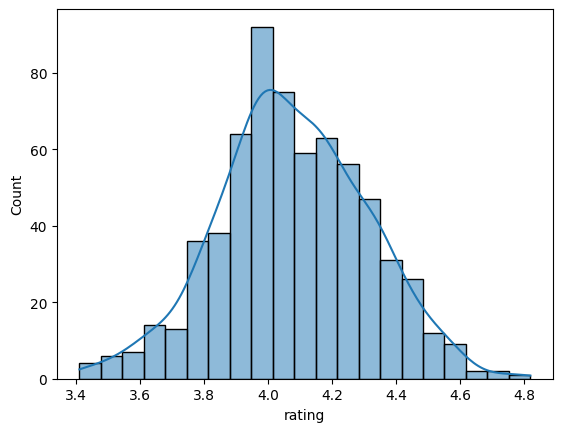

In [162]:
# NOTE: sns.hisplot only shows one plot per cell
sns.histplot(book['rating'], kde=True)

<Axes: xlabel='likedPercent', ylabel='Count'>

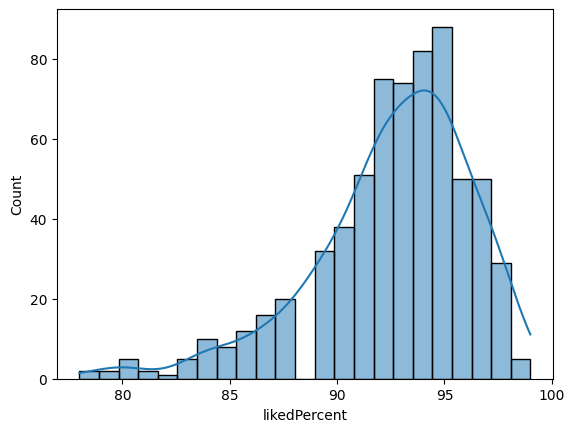

In [163]:
sns.histplot(book['likedPercent'], kde=True)

<Axes: xlabel='price', ylabel='Count'>

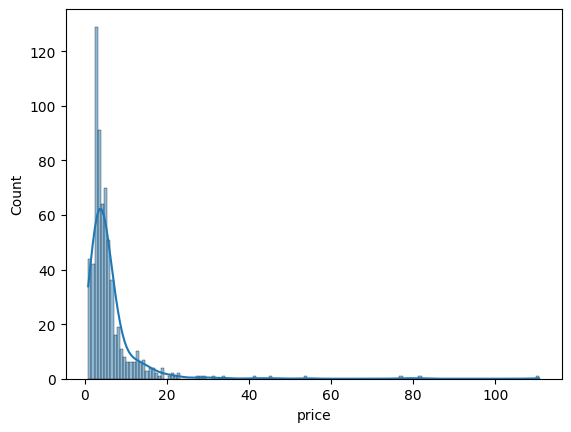

In [164]:
sns.histplot(book['price'], kde=True)

Treating outliers

# Outliers


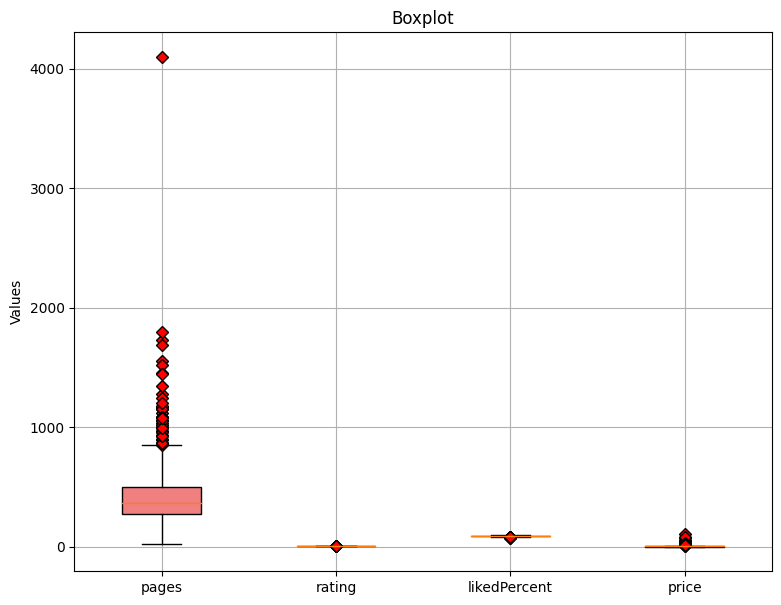

In [165]:
print('# Outliers')

fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(9, 7))
bplot = ax1.boxplot(
    book.select_dtypes(include = ["float64"]),
    vert=True,
    patch_artist=True,
    labels=['pages','rating', 'likedPercent', 'price'],
    flierprops=dict(markerfacecolor='r', marker='D')
    )
ax1.set_title('Boxplot')

colors = ['lightcoral', 'mediumpurple', 'gold','aquamarine']

for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

for ax in [ax1]:
    ax.yaxis.grid(True)
    ax.xaxis.grid(True)
    ax.set_ylabel('Values')

plt.show()

In [166]:
# Removing outliers using Z score

def show_min_max(df:pd.DataFrame, column:str) -> None:
    print(f'\tmin {column}: {df[column].min()}\tmax {column}: {df[column].max()}')

threshold = 3
for column in ['pages', 'rating', 'likedPercent', 'price']:
    print('')
    print(f'Outliers for {column}')
    z = np.abs(stats.zscore(book['pages']))
    display(z)
    print('Before removing outliers')
    show_min_max(book, 'pages')
    book = book[(z < threshold)]
    print('After removing outliers')
    show_min_max(book, 'pages')


Outliers for pages


0      0.169551
1      1.542255
4      0.268754
5      0.444766
6      0.973686
         ...   
814    0.228222
815    0.317071
816    0.024600
818    0.320522
819    0.361937
Name: pages, Length: 657, dtype: float64

Before removing outliers
	min pages: 26.0	max pages: 4100.0
After removing outliers
	min pages: 26.0	max pages: 1276.0

Outliers for rating


0      0.134665
1      2.142164
4      0.448313
5      0.682423
6      1.204225
         ...   
814    0.212702
815    0.512579
816    0.058131
818    0.517169
819    0.572254
Name: pages, Length: 648, dtype: float64

Before removing outliers
	min pages: 26.0	max pages: 1276.0
After removing outliers
	min pages: 26.0	max pages: 1049.0

Outliers for likedPercent


0      0.068177
1      2.547646
4      0.601600
5      0.870566
6      1.296981
         ...   
814    0.157832
815    0.675434
816    0.153324
818    0.680708
819    0.743994
Name: pages, Length: 634, dtype: float64

Before removing outliers
	min pages: 26.0	max pages: 1049.0
After removing outliers
	min pages: 26.0	max pages: 936.0

Outliers for price


0      0.012310
1      2.858521
4      0.722762
5      1.017948
6      1.360906
         ...   
814    0.110705
815    0.803793
816    0.230785
818    0.809581
819    0.879037
Name: pages, Length: 623, dtype: float64

Before removing outliers
	min pages: 26.0	max pages: 936.0
After removing outliers
	min pages: 26.0	max pages: 870.0


### Analizing the impact of computing advances on real estate sales

Analizing correlations between computing advances and real estate sales.

We will ignore correlations between computer advances columns and years, only focus on computer advances vs real estate correlations.

Analizing correlations

In [167]:
computing_and_real_estate = merge_by_year([computer_advances, real_estate])
numeric_df = computing_and_real_estate.select_dtypes(include=['float64', 'int', 'int64'])
columns_to_analize_correlation = numeric_df.columns[1:]

<Axes: >

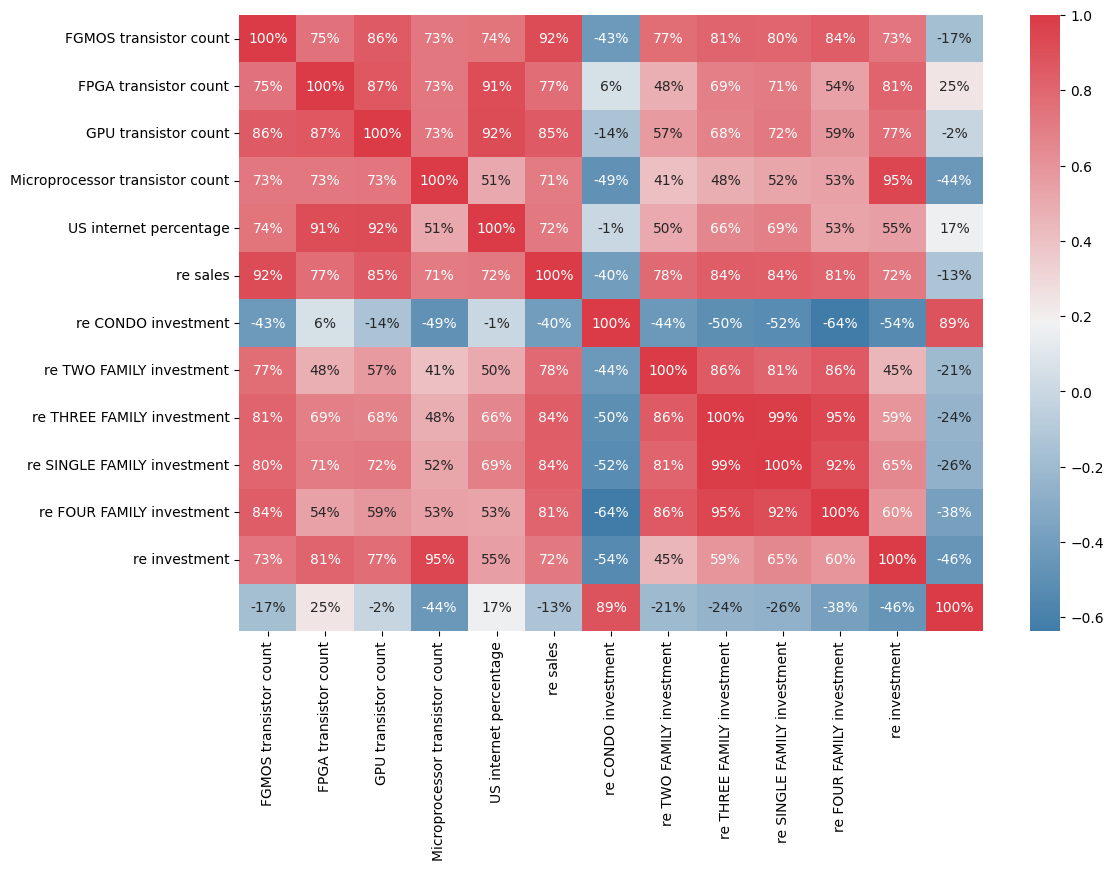

In [168]:
corr = computing_and_real_estate.corr()
plt.subplots(figsize=(12,8))
sns.heatmap(
    corr,
    xticklabels=columns_to_analize_correlation,
    yticklabels=columns_to_analize_correlation,
    annot=True,
    fmt='.0%',
    cmap=sns.diverging_palette(240, 10, as_cmap=True)
    )

We can see a high correlation on "Microprocessor transistor count" vs "re investment"

In [169]:
print("Variables most correlated with real estate total investment")
display(corr['re investment'].abs().sort_values(ascending=False))
print("Variables most correlated with real estate total sales")
display(corr['re sales'].abs().sort_values(ascending=False))

Variables most correlated with real estate total investment


re investment                      1.000000
re sales                           0.891257
re FOUR FAMILY investment          0.463065
GPU transistor count               0.441144
re SINGLE FAMILY investment        0.381849
re THREE FAMILY investment         0.263131
FGMOS transistor count             0.245910
re TWO FAMILY investment           0.243688
re CONDO investment                0.205083
Year                               0.174011
Microprocessor transistor count    0.167502
US internet percentage             0.133680
FPGA transistor count              0.018511
Name: re investment, dtype: float64

Variables most correlated with real estate total sales


re sales                           1.000000
re investment                      0.891257
re SINGLE FAMILY investment        0.635902
re FOUR FAMILY investment          0.539678
re THREE FAMILY investment         0.521715
re TWO FAMILY investment           0.501825
GPU transistor count               0.487257
re CONDO investment                0.435862
Year                               0.428682
US internet percentage             0.399518
FPGA transistor count              0.142902
FGMOS transistor count             0.056822
Microprocessor transistor count    0.008890
Name: re sales, dtype: float64

We can see that the most correlated computing advance with real estate sales and investment is the "GPU transistor count" with 0.48 correlation, note that this is a low correlation, ideal correlation should be close to 1 or -1.

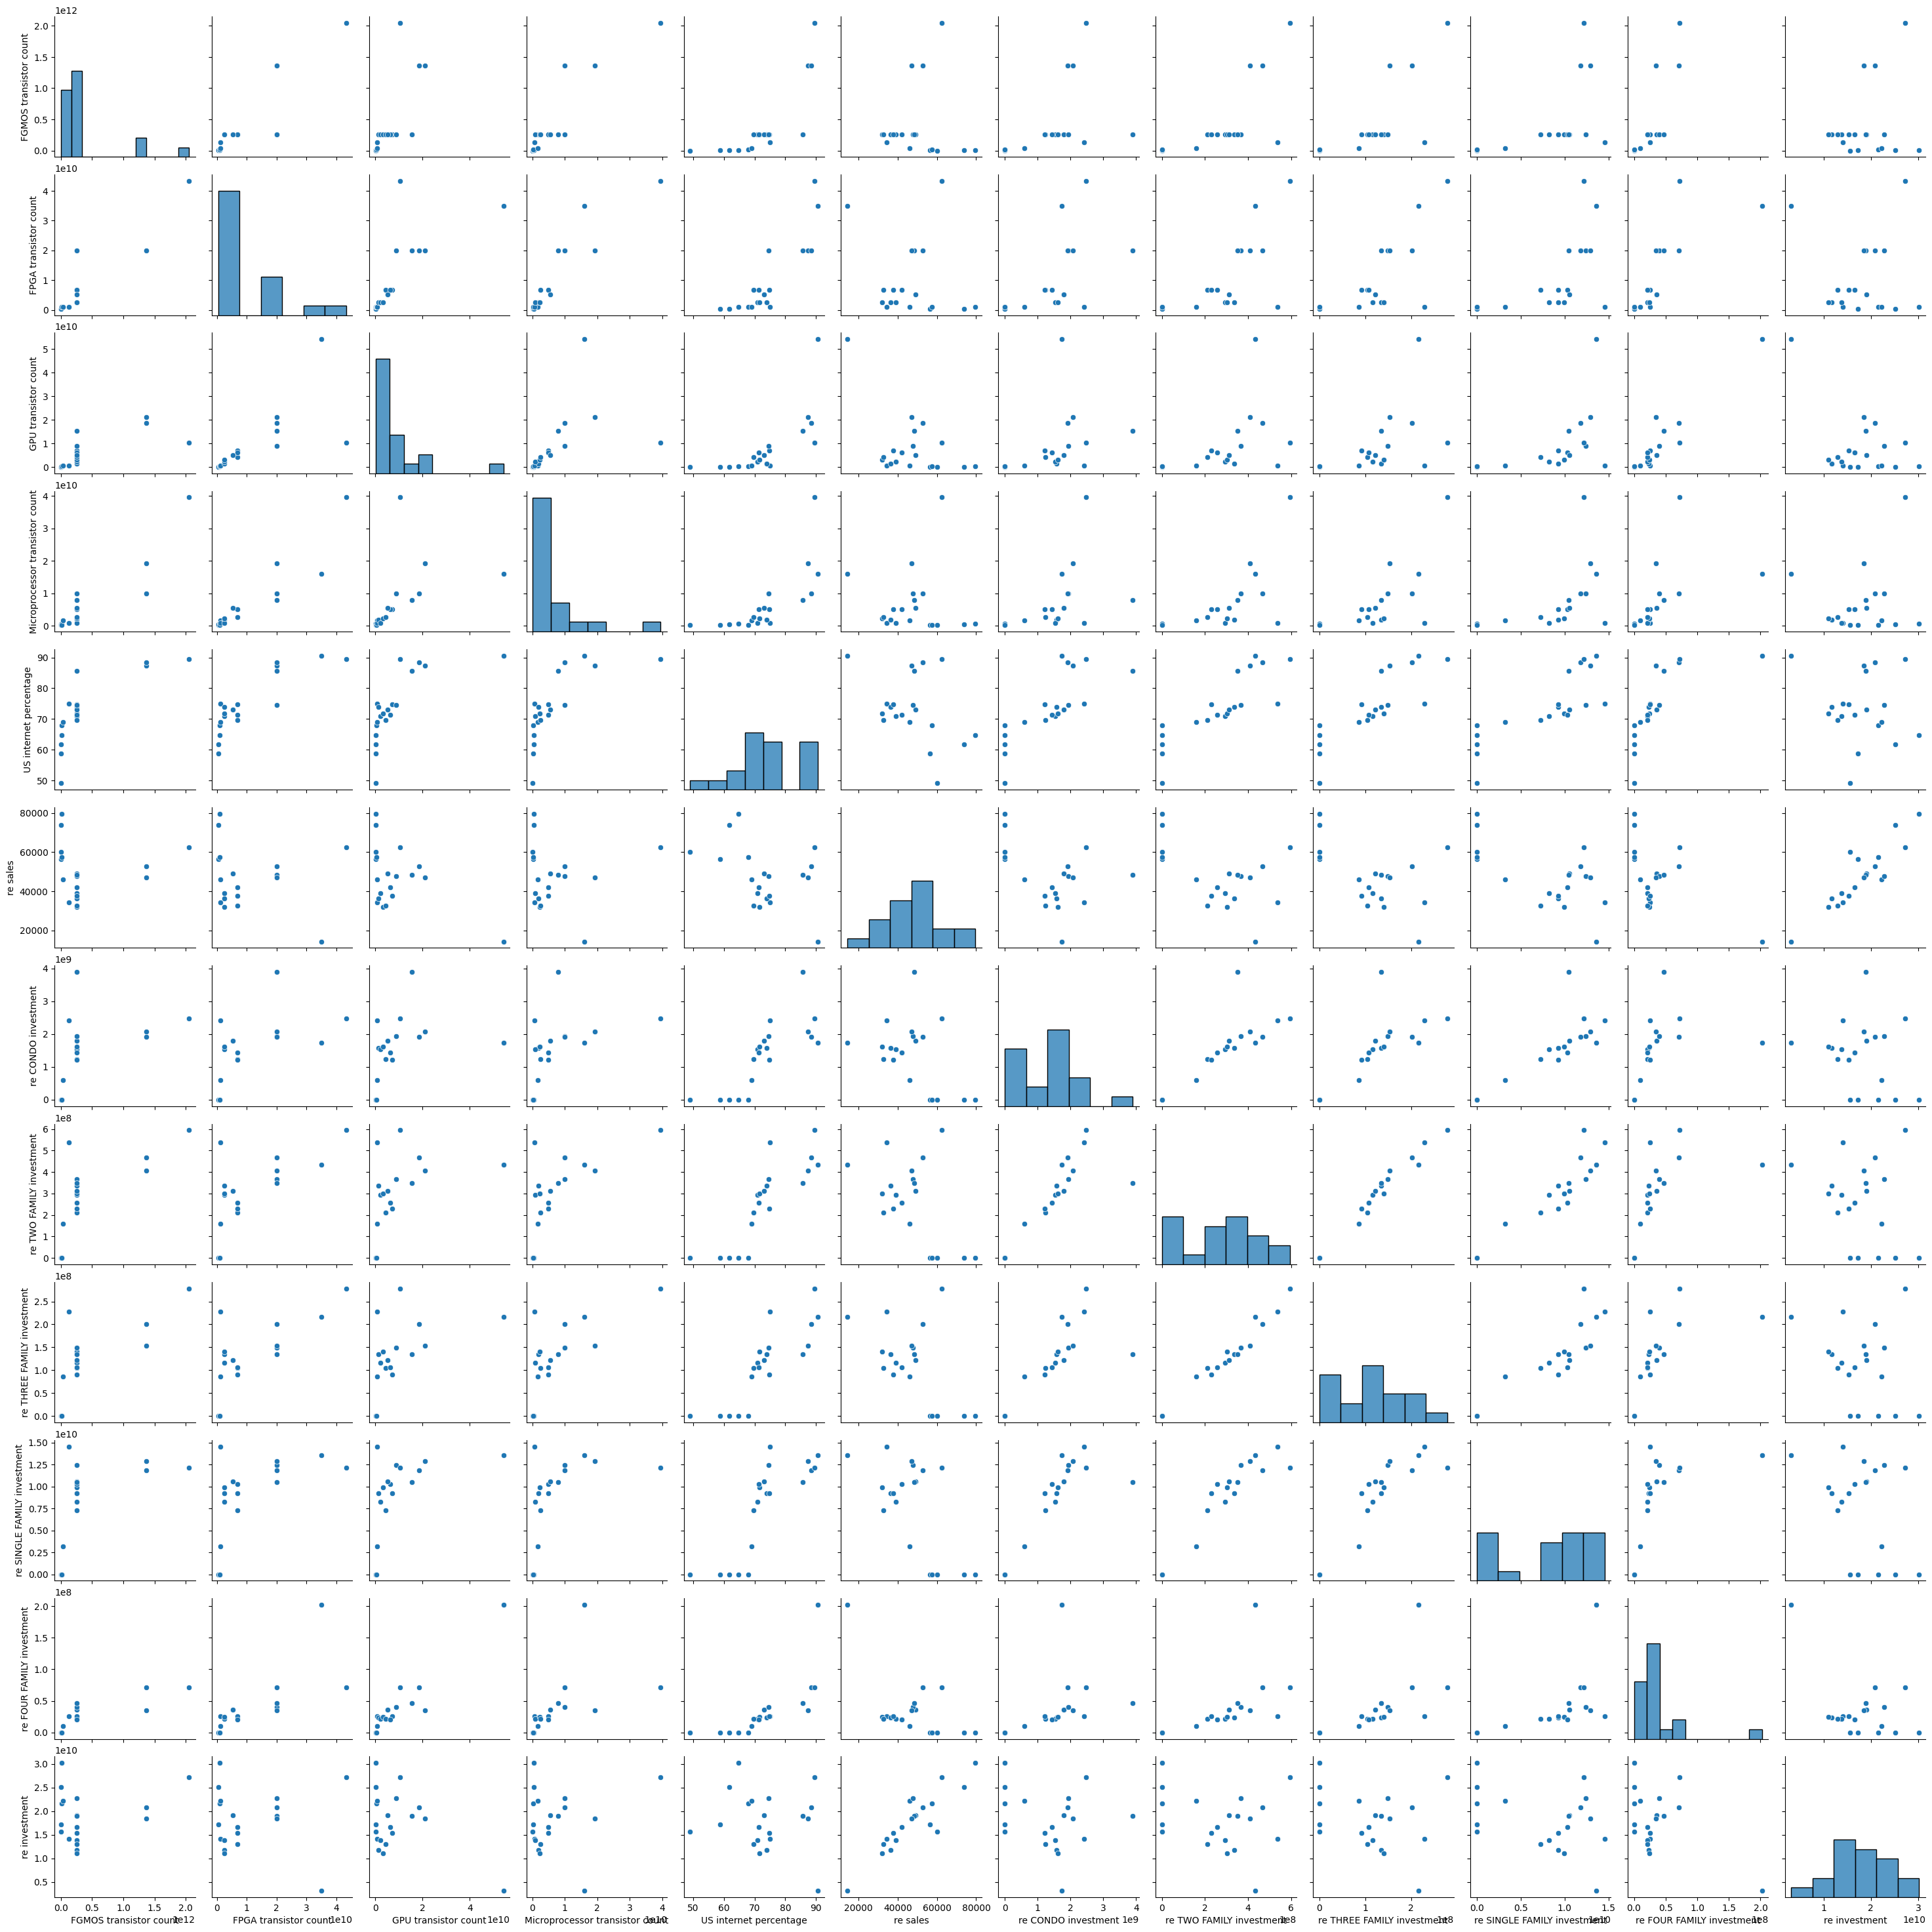

In [170]:
pp = sns.pairplot(
    numeric_df,
    x_vars=columns_to_analize_correlation,
    y_vars=columns_to_analize_correlation
    )

On a first look we can see correlations in multiple columns, some of them are:

- "US internet percentage" vs "re THREE FAMILY investment"
- "Microprocessor transistor count" vs "re SINGLE FAMILY investment"

Also we can see very clear correlation between real estate columns but that is out of scope of this research.

Let's see these correlations in deep and try to do some predictions using Sklearn.

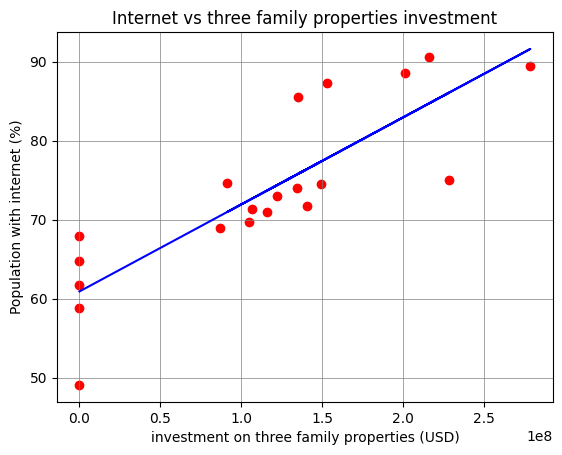

In [171]:
# Review in deep "US internet percentage" vs "re THREE FAMILY investment"
X = computing_and_real_estate['re THREE FAMILY investment'].values.reshape(-1,1)
y = computing_and_real_estate['US internet percentage'].values.reshape(-1,1)
#
lin_reg = LinearRegression()
lin_reg.fit(X,y)
#
plt.scatter(X, y, color = "red")
plt.plot(X, lin_reg.predict(X), color = "blue")
plt.title("Internet vs three family properties investment")
plt.xlabel("investment on three family properties (USD)")
plt.ylabel("Population with internet (%)")
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.show()

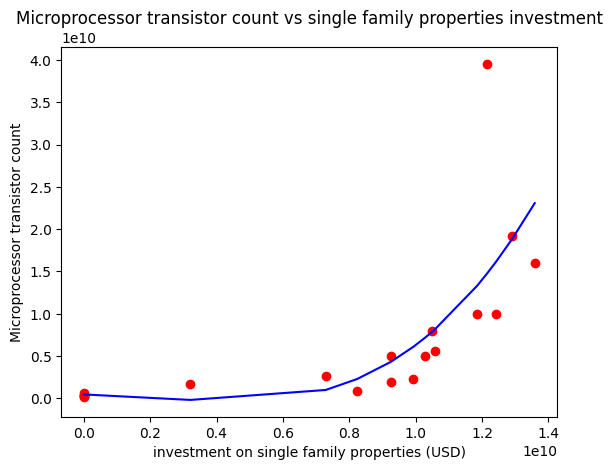

In [172]:
# Review in deep "Microprocessor transistor count" vs "re SINGLE FAMILY investment"
#
# Remove this value (it's only one row) to get a better prediction
computing_and_real_estate = computing_and_real_estate[computing_and_real_estate['re SINGLE FAMILY investment'] < 14000000000]
# Sort X axis to avoid an horrible polynomial prediction
computing_and_real_estate = computing_and_real_estate.sort_values(by=['re SINGLE FAMILY investment'])
#
y = computing_and_real_estate['Microprocessor transistor count'].values.reshape(-1,1)
X = computing_and_real_estate['re SINGLE FAMILY investment'].values.reshape(-1,1)
#
lin_reg=LinearRegression()
lin_reg.fit(X,y)
poly_reg=PolynomialFeatures(degree=3)
X_poly=poly_reg.fit_transform(X)
poly_reg.fit(X_poly,y)
lin_reg2=LinearRegression()
lin_reg2.fit(X_poly,y)
#
plt.scatter(X,y,color='red')
plt.plot(X,lin_reg2.predict(poly_reg.fit_transform(X)),color='blue')
plt.title('Microprocessor transistor count vs single family properties investment')
plt.xlabel('investment on single family properties (USD)')
plt.ylabel('Microprocessor transistor count')
plt.show()

We have a clue that the GPU advances has the most impact on real estate sales and investments based on the correlation analysis, but now let's go more deep and try to get how much has impacted each computer technology using multiple linear regression.

Let's start analizing the computer advances with real estate INVESTMENT.

In [173]:
df = computing_and_real_estate
df = df.dropna()
#
X = keep_columns(
    df,
    df.columns[1:-1].tolist()
    )
y = df['re investment'].values
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
df = df.drop(columns=['re investment', 'Year'], axis=1)
df = df.T
df = df.index
coeff_df = pd.DataFrame(regressor.coef_, df, columns=['Coefficient'])
coeff_df

,Coefficient
FGMOS transistor count,-2.224972e-02
FPGA transistor count,-6.263642e-02
GPU transistor count,8.761105e-03
Microprocessor transistor count,9.342330e-01
US internet percentage,1.255950e+09
re sales,2.285856e+05
re CONDO investment,-8.669827e+00
re TWO FAMILY investment,-5.435286e+01
re THREE FAMILY investment,4.441187e+01
re SINGLE FAMILY investment,4.920638e-01


We can see that for each percentage of population with access to the internet, the real estate investment increases 1.2x10^9 USD, this make the internet the most important computing advance for real estate investment.

Let's see the same analysis but for real estate SALES.

In [174]:
df = computing_and_real_estate
df = df.dropna()
#
X = keep_columns(
    df,
    df.columns[1:-1].tolist()
    )
y = df['re sales'].values
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
df = df.drop(columns=['re sales', 'Year'], axis=1)
df = df.T
df = df.index
coeff_df = pd.DataFrame(regressor.coef_, df, columns=['Coefficient'])
coeff_df

,Coefficient
FGMOS transistor count,1.944215e-19
FPGA transistor count,4.884932e-17
GPU transistor count,-2.794747e-17
Microprocessor transistor count,-2.726835e-17
US internet percentage,5.135014e-08
re CONDO investment,1.000000e+00
re TWO FAMILY investment,-8.055581e-17
re THREE FAMILY investment,-9.319453e-17
re SINGLE FAMILY investment,-1.298297e-14
re FOUR FAMILY investment,-5.123188e-17


Again, we can see that the tecnology that has the better coefficient is internet

### Conclusion

Analizing the real estate business analytics in conjunction with computing advances, we can see that internet was the technology with most impact on sales and investment, also we have seen that the increment on microprocessor transistors has a correlation with investments made on single family properties.

But this is not very conclusive because other factors as the politics taken by the government and the boom of 2008 could distort the results.

We should take a look into other industries as the crude oil production or book publishing to see if we can get more conclusive results of how much has impacted each computing advance on conventional businesses and markets.

to be continued ...